In [1]:
# standard ML library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,18)})

# tambahan
#import plotly.express as px

# Preprocess
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
#from sklearn.decomposition import PCA
#import category_encoders as ce

# Tuning
from sklearn.model_selection import StratifiedShuffleSplit

# models
# We use a utility to generate artificial classification data.
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('final_dataset_pph_badan.csv')
df.head()

,Nomor Putusan,Jenis Pajak,Tahun Pajak,DV_Menang,case_circumstances,government_statement,taxpayer_statement,court_statement,court_considerants,case_contents,...,taxpayer_statement_bow_prob_topic_5,taxpayer_statement_bow_prob_topic_6,government_statement_bow_assigned_topic,government_statement_bow_prob_topic_0,government_statement_bow_prob_topic_1,government_statement_bow_prob_topic_2,court_statement_bow_assigned_topic,court_statement_bow_prob_topic_0,court_statement_bow_prob_topic_1,court_statement_bow_prob_topic_2
0,Put.086980.15.pdf,PPh Badan,2011,0,bahwa nilai sengketa terbukti dalam sengketa b...,a. koreksi atas biaya royalti sebesar rp. 52.0...,menurut pemohon banding koreksi atas pembayara...,menurut majelis : bahwa yang menjadi sengketa ...,bahwa dalam sengketa banding ini tidak terdapa...,bahwa nilai sengketa terbukti dalam sengketa b...,...,0.892726,0.017858,0,0.939430,0.029636,0.030934,0,0.094579,0.001680,0.903741
1,Put.087101.15.pdf,PPh Badan,2012,0,bahwa nilai sengketa terbukti dalam sengketa b...,bahwa menurut terbanding koreksi harga pokok p...,bahwa metode comparable uncontrolled price (cu...,menurut majelis : bahwa majelis berpendapat sk...,bahwa dalam hal dilakukan analisa berdasar com...,bahwa nilai sengketa terbukti dalam sengketa b...,...,0.015918,0.015874,0,0.777609,0.111162,0.111229,0,0.045524,0.896758,0.057718
2,Put.098444.15.pdf,PPh Badan,2012,1,bahwa nilai sengketa terbukti dalam banding in...,bahwa dasar dilakukan koreksi technical assist...,pemohon banding mengemukakan mengenai jasa yan...,menurut majelis : bahwa yang menjadi sengketa ...,"atas hasil pemeriksaan dalam persidangan, maje...",bahwa nilai sengketa terbukti dalam banding in...,...,0.001905,0.001905,0,0.814736,0.083563,0.101702,0,0.998579,0.000709,0.000712
3,Put.098538.15.pdf,PPh Badan,2012,0,bahwa nilai yang menjadi pokok sengketa dalam ...,bahwa oleh terbanding dalam sub dan penjelasan...,bahwa pemohon banding menambahkan penjelasanny...,menurut majelis : bahwa yang menjadi sengketa ...,bahwa atas hasil pemeriksaan dalam persidangan...,bahwa nilai yang menjadi pokok sengketa dalam ...,...,0.003248,0.003247,0,0.915648,0.045744,0.038608,0,0.997729,0.001116,0.001154
4,Put.106741.15.pdf,PPh Badan,2013,0,bahwa nilai sengketa terbukti dalam sengketa b...,bahwa pada saat pembahasan akhir hasil pemerik...,"bahwa koreksi positif sejumlah usd12,914,809 m...","menurut majelis : bahwa menurut terbanding, te...",bahwa dalam sengketa banding ini terdapat seng...,bahwa nilai sengketa terbukti dalam sengketa b...,...,0.000563,0.000563,1,0.002377,0.995373,0.002250,2,0.001325,0.001220,0.997455


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Nomor Putusan                            18 non-null     object 
 1   Jenis Pajak                              18 non-null     object 
 2   Tahun Pajak                              18 non-null     int64  
 3   DV_Menang                                18 non-null     int64  
 4   case_circumstances                       18 non-null     object 
 5   government_statement                     18 non-null     object 
 6   taxpayer_statement                       18 non-null     object 
 7   court_statement                          18 non-null     object 
 8   court_considerants                       18 non-null     object 
 9   case_contents                            18 non-null     object 
 10  case_main_contents                       18 non-null

In [4]:
features = list(df.columns[df.columns.str.contains("_prob_topic_")])
features

['taxpayer_statement_bow_prob_topic_0',
 'taxpayer_statement_bow_prob_topic_1',
 'taxpayer_statement_bow_prob_topic_2',
 'taxpayer_statement_bow_prob_topic_3',
 'taxpayer_statement_bow_prob_topic_4',
 'taxpayer_statement_bow_prob_topic_5',
 'taxpayer_statement_bow_prob_topic_6',
 'government_statement_bow_prob_topic_0',
 'government_statement_bow_prob_topic_1',
 'government_statement_bow_prob_topic_2',
 'court_statement_bow_prob_topic_0',
 'court_statement_bow_prob_topic_1',
 'court_statement_bow_prob_topic_2']

In [5]:
X=df[features]
X

,taxpayer_statement_bow_prob_topic_0,taxpayer_statement_bow_prob_topic_1,taxpayer_statement_bow_prob_topic_2,taxpayer_statement_bow_prob_topic_3,taxpayer_statement_bow_prob_topic_4,taxpayer_statement_bow_prob_topic_5,taxpayer_statement_bow_prob_topic_6,government_statement_bow_prob_topic_0,government_statement_bow_prob_topic_1,government_statement_bow_prob_topic_2,court_statement_bow_prob_topic_0,court_statement_bow_prob_topic_1,court_statement_bow_prob_topic_2
0,0.017897,0.017903,0.017893,0.017866,0.017858,0.892726,0.017858,0.939430,0.029636,0.030934,0.094579,0.001680,0.903741
1,0.015874,0.015874,0.904710,0.015874,0.015874,0.015918,0.015874,0.777609,0.111162,0.111229,0.045524,0.896758,0.057718
2,0.001905,0.001905,0.001905,0.001905,0.988570,0.001905,0.001905,0.814736,0.083563,0.101702,0.998579,0.000709,0.000712
3,0.003247,0.003248,0.003248,0.980516,0.003247,0.003248,0.003247,0.915648,0.045744,0.038608,0.997729,0.001116,0.001154
4,0.000563,0.996624,0.000563,0.000563,0.000563,0.000563,0.000563,0.002377,0.995373,0.002250,0.001325,0.001220,0.997455
5,0.000187,0.000187,0.998879,0.000187,0.000187,0.000187,0.000187,0.997247,0.001426,0.001326,0.990828,0.004427,0.004745
6,0.003323,0.003323,0.980056,0.003323,0.003323,0.003327,0.003325,0.174505,0.184784,0.640712,0.999236,0.000380,0.000384
7,0.005292,0.005292,0.005292,0.005291,0.005291,0.968248,0.005293,0.211177,0.043112,0.745711,0.000636,0.998738,0.000626
8,0.015874,0.015879,0.015882,0.015874,0.015874,0.904732,0.015886,0.083845,0.085352,0.830803,0.999071,0.000465,0.000464
9,0.004202,0.004202,0.004204,0.004202,0.004202,0.004202,0.974785,0.930406,0.033421,0.036173,0.001705,0.996657,0.001638


In [6]:
y=df['DV_Menang']
y

0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     1
8     0
9     1
10    1
11    0
12    1
13    0
14    1
15    0
16    0
17    0
Name: DV_Menang, dtype: int64

In [7]:
import pickle
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score


TRAIN: [ 5 16  3  1  8  7 14 13 17 10  9 11] TEST: [ 2 12  0  4  6 15]
accuracy of SVC model 1: 0.5
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.00      0.00      0.00         2

    accuracy                           0.50         6
   macro avg       0.30      0.38      0.33         6
weighted avg       0.40      0.50      0.44         6



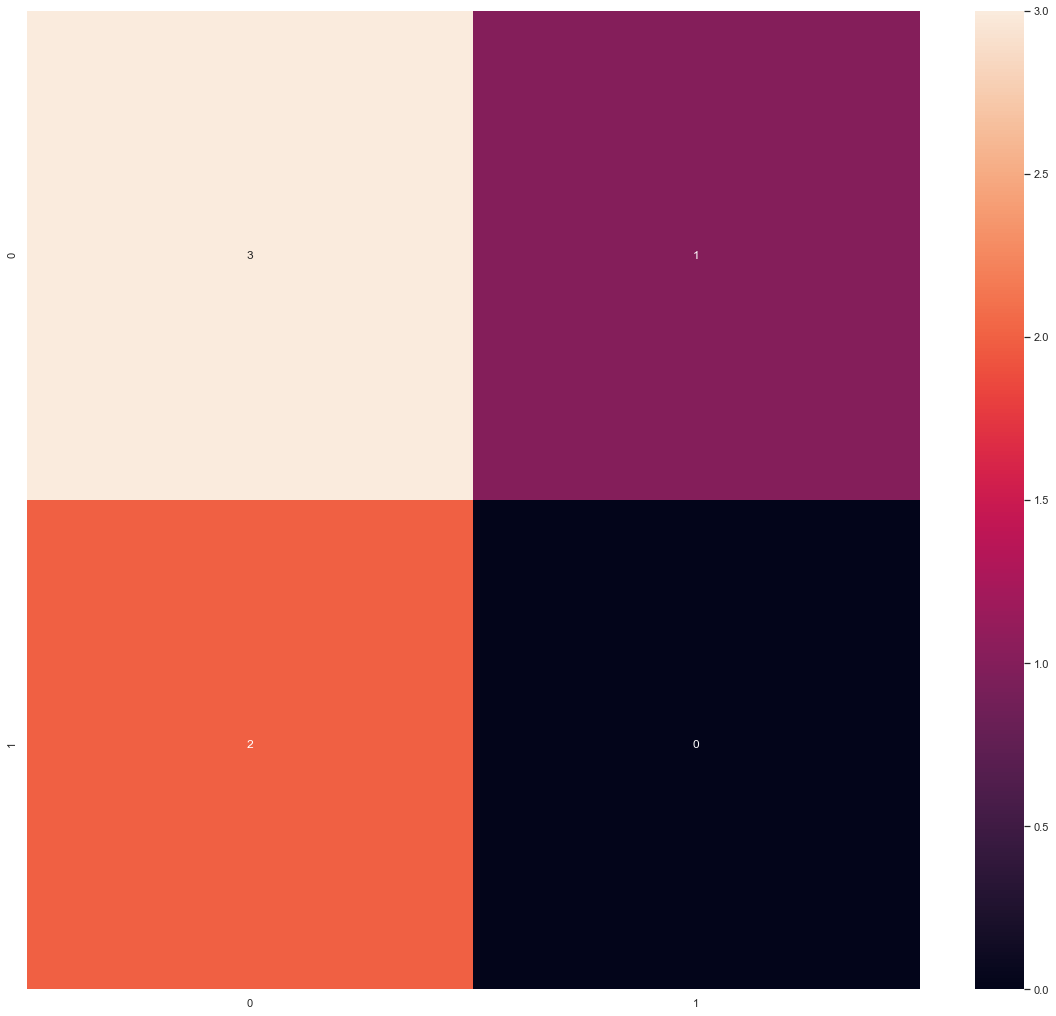

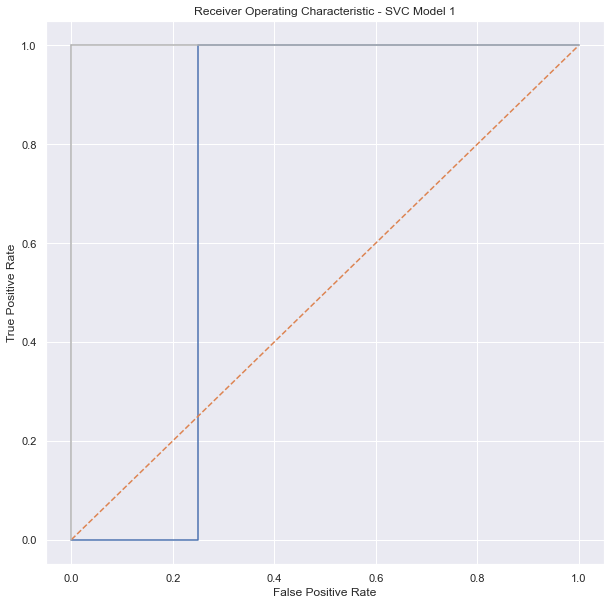

AUC of the ROC Curve for model 1: 0.75


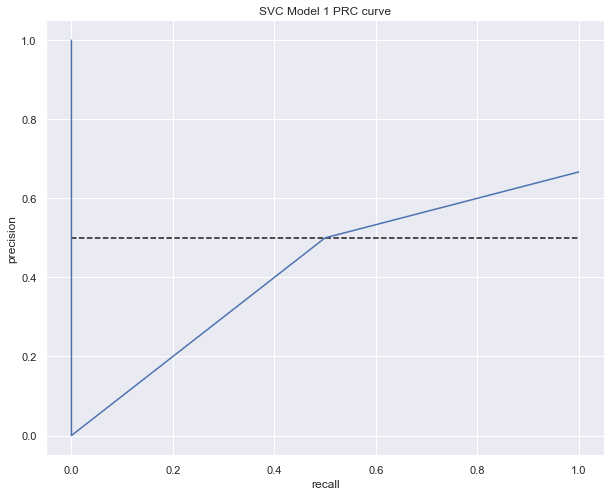

AUC of PRC Curve for SVC Model 1: 0.41666666666666663
TRAIN: [11  9 12  6 16 14 15  5  1  8 10 17] TEST: [ 0  3  4  7  2 13]
accuracy of SVC model 2: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



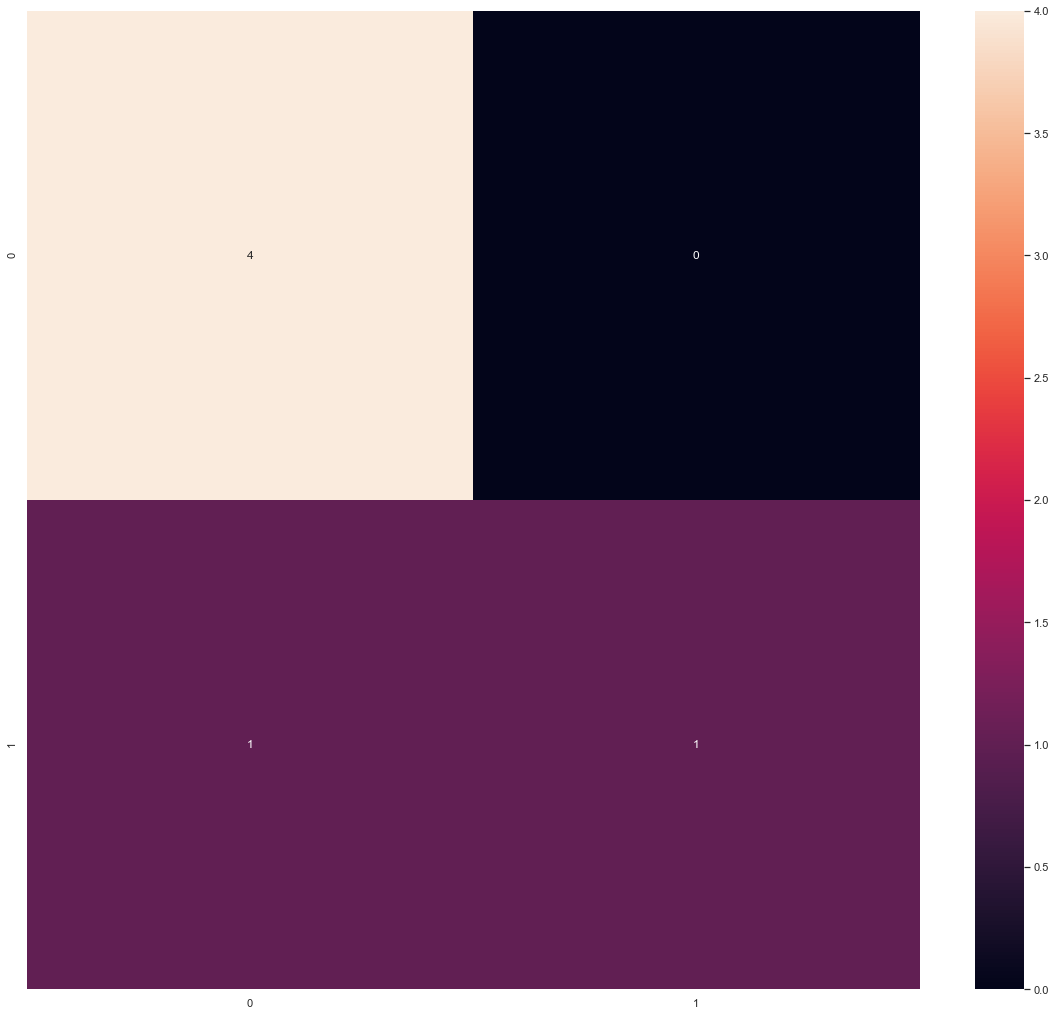

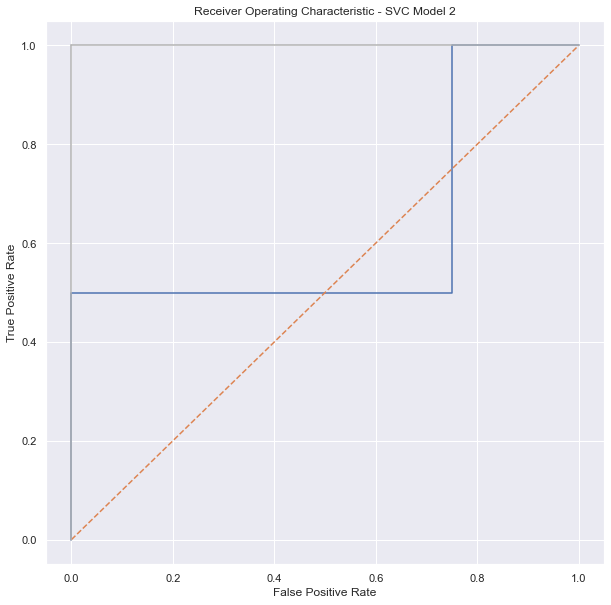

AUC of the ROC Curve for model 2: 0.625


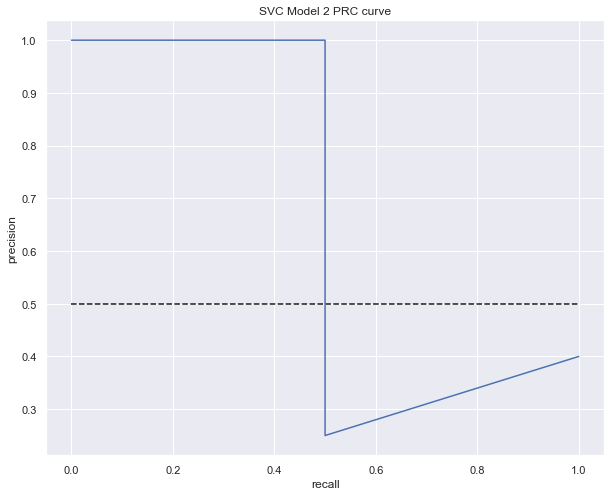

AUC of PRC Curve for SVC Model 2: 0.6625
TRAIN: [11 15  2 10  9  6  3 16 17  4  0 12] TEST: [ 5 13  1  8  7 14]
accuracy of SVC model 3: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6



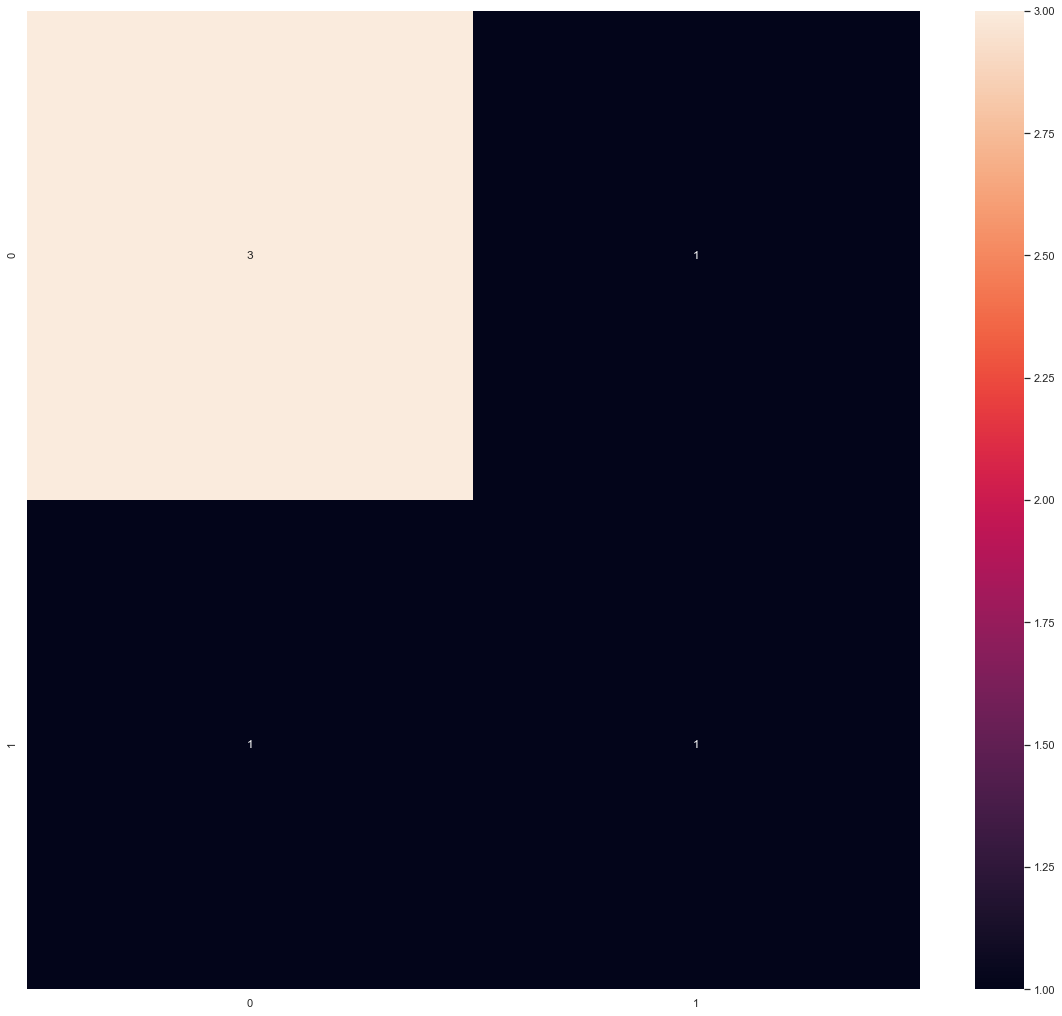

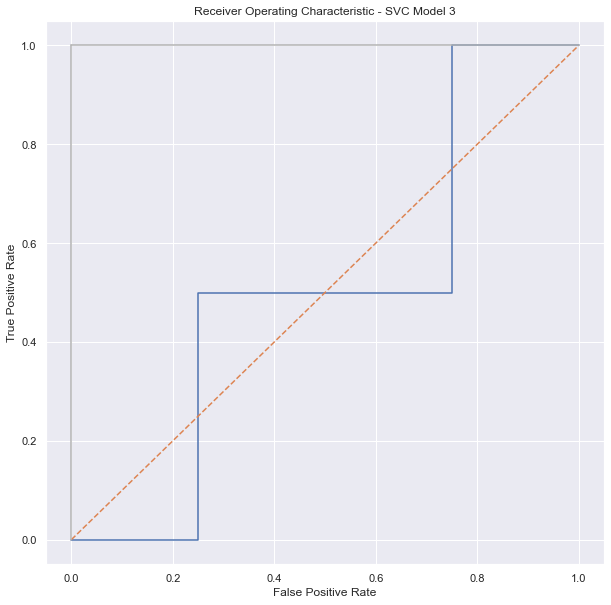

AUC of the ROC Curve for model 3: 0.5


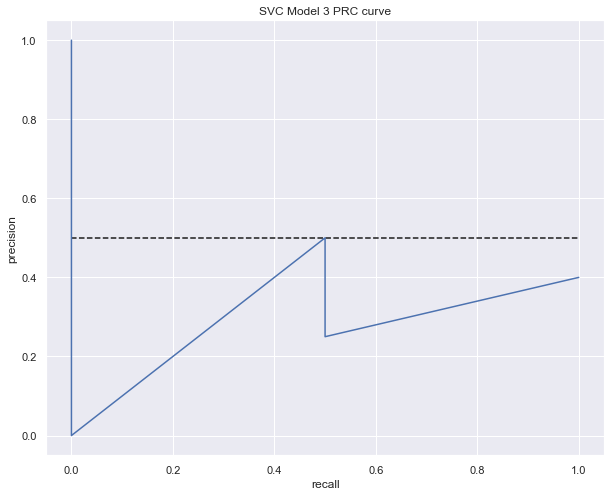

AUC of PRC Curve for SVC Model 3: 0.2875
TRAIN: [ 6  7  9  3  1  8 14 12  0 16 11 15] TEST: [ 2 13 10  5 17  4]
accuracy of SVC model 4: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



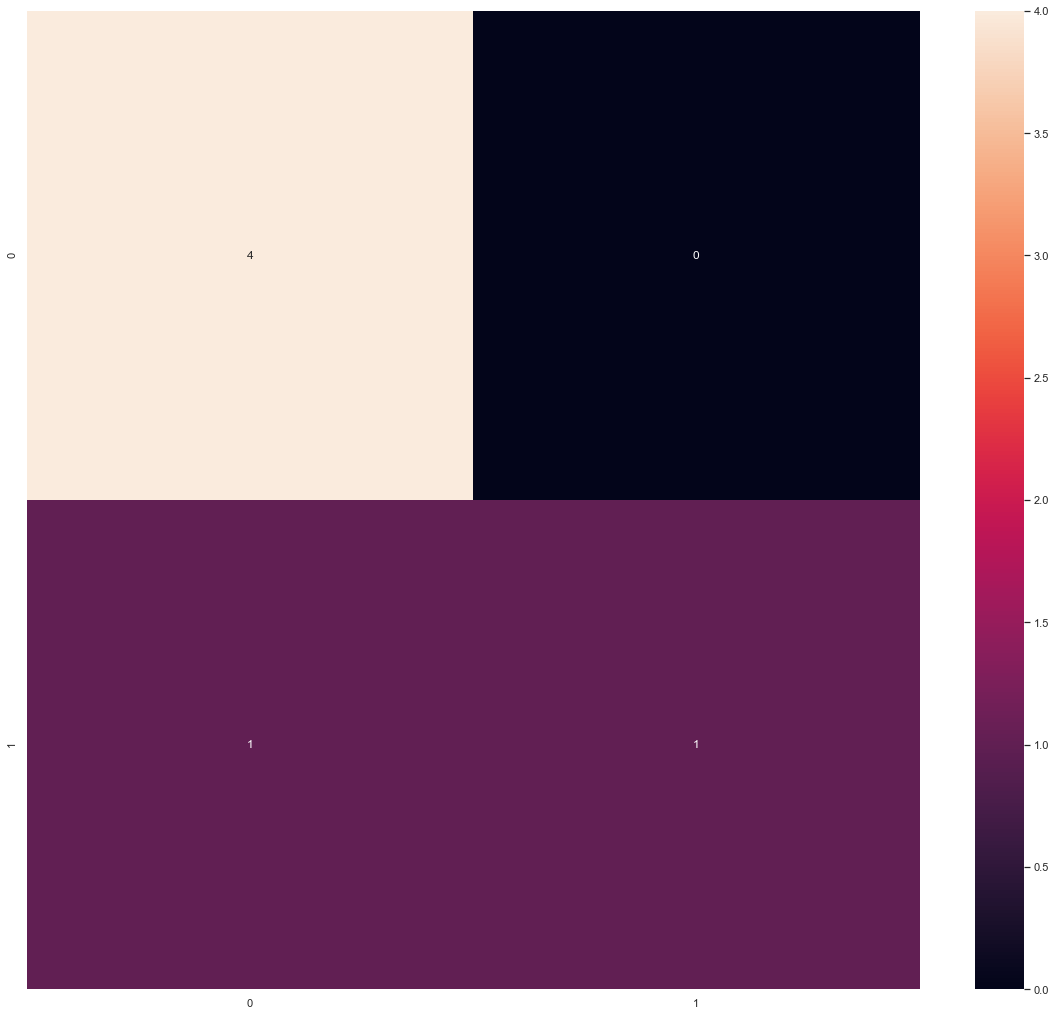

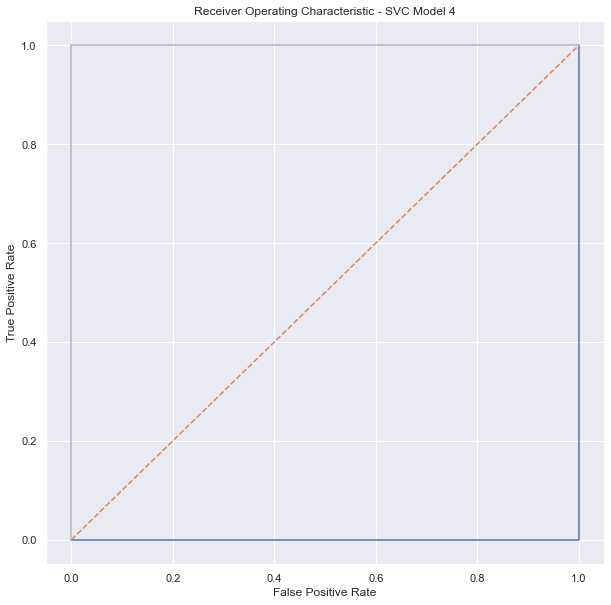

AUC of the ROC Curve for model 4: 0.0


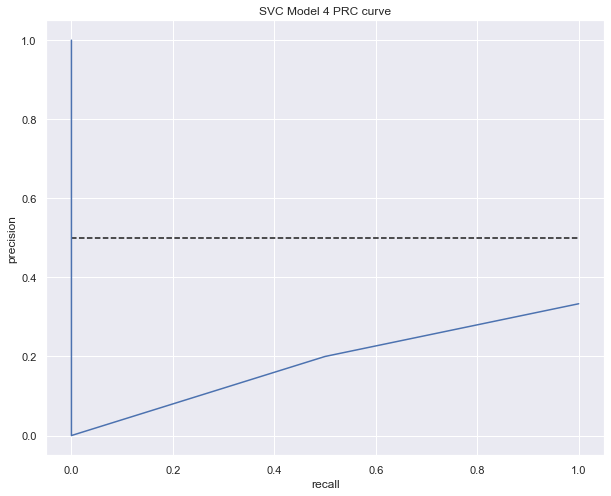

AUC of PRC Curve for SVC Model 4: 0.18333333333333335
TRAIN: [ 2  7  1  4 15  5 13  8  6  0  9 14] TEST: [11  3 12 16 10 17]
accuracy of SVC model 5: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



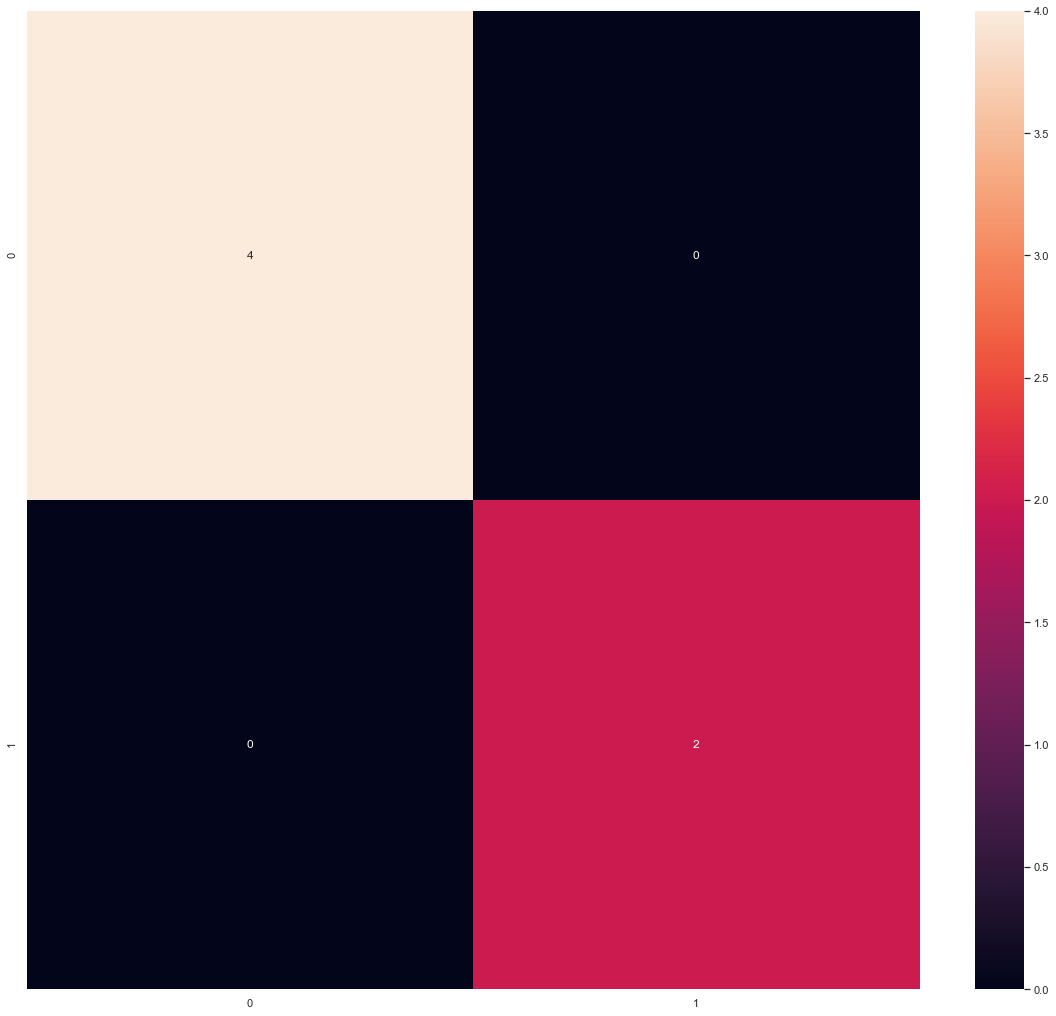

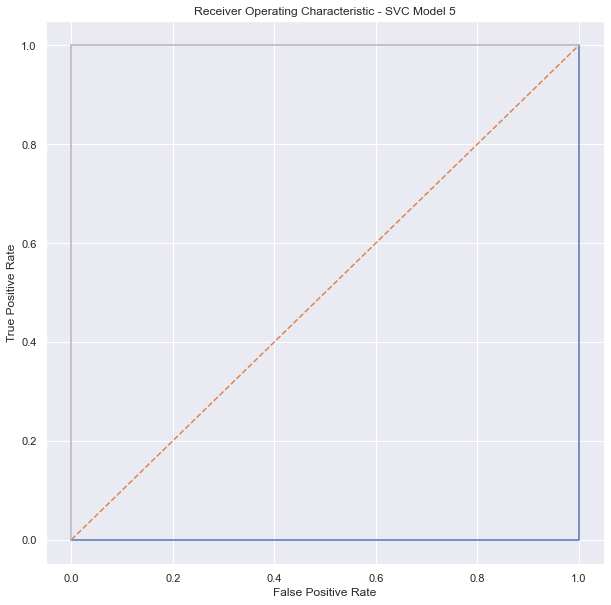

AUC of the ROC Curve for model 5: 0.0


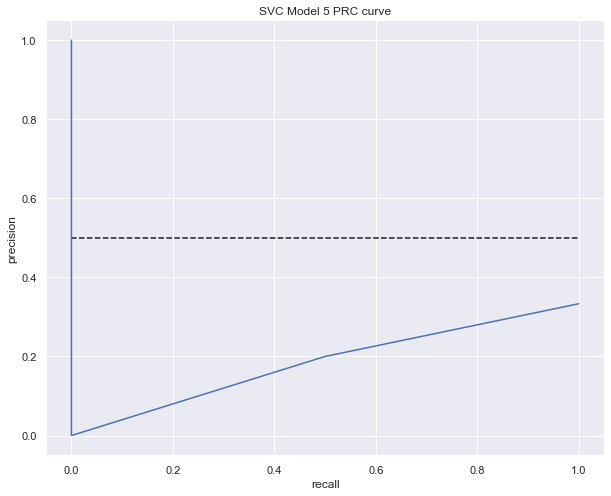

AUC of PRC Curve for SVC Model 5: 0.18333333333333335


In [10]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
mod_count=1
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = SVC(gamma='auto', probability=True, kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print('accuracy of SVC model {}: {}'.format(mod_count, clf.score(X_test, y_test)))
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,fmt="d")
    print(classification_report(y_test, clf.predict(X_test)))
    
    #ROC Curve
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - SVC Model {}'.format(mod_count))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print("AUC of the ROC Curve for model {}: {}".format(mod_count,roc_auc_score(y_test, y_pred_proba)))
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    plt.figure(figsize = (10,8))
    plt.plot([0, 1], [0.5, 0.5],'k--')
    plt.plot(recall, precision, label = 'SVC Model {}'.format(mod_count))
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.title('SVC Model {} PRC curve'.format(mod_count))
    plt.show()
    
    # calculate precision-recall AUC
    auc_prc = auc(recall, precision)
    print('AUC of PRC Curve for SVC Model {}: {}'.format(mod_count,auc_prc))
    
    #save model
    filename = 'SVC_PPh_model_{}.sav'.format(mod_count)
    pickle.dump(clf, open(filename, 'wb'))
    
    mod_count+=1

In [11]:
model_selected = pickle.load(open('SVC_model_5.sav', 'rb'))
model_selected.coef_

array([[-0.03891345,  0.54614943,  0.19523998, -0.38416567, -0.31831033,
        -0.82825774, -0.02046942, -0.37848505,  1.68211385, -0.45490168,
         0.16178753,  0.80454798, -0.96633566]])